**Setup Environment**

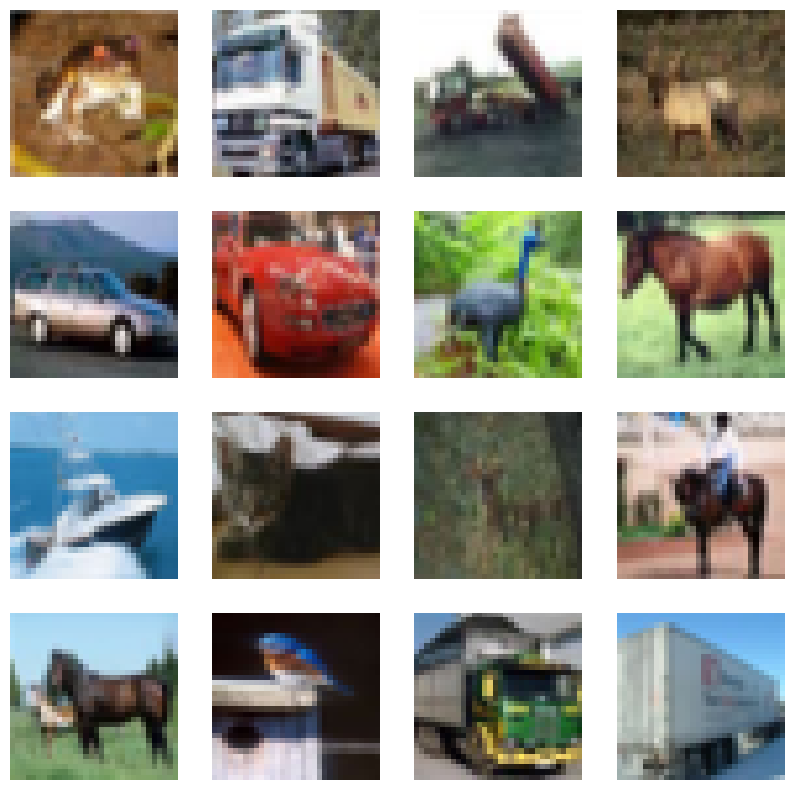

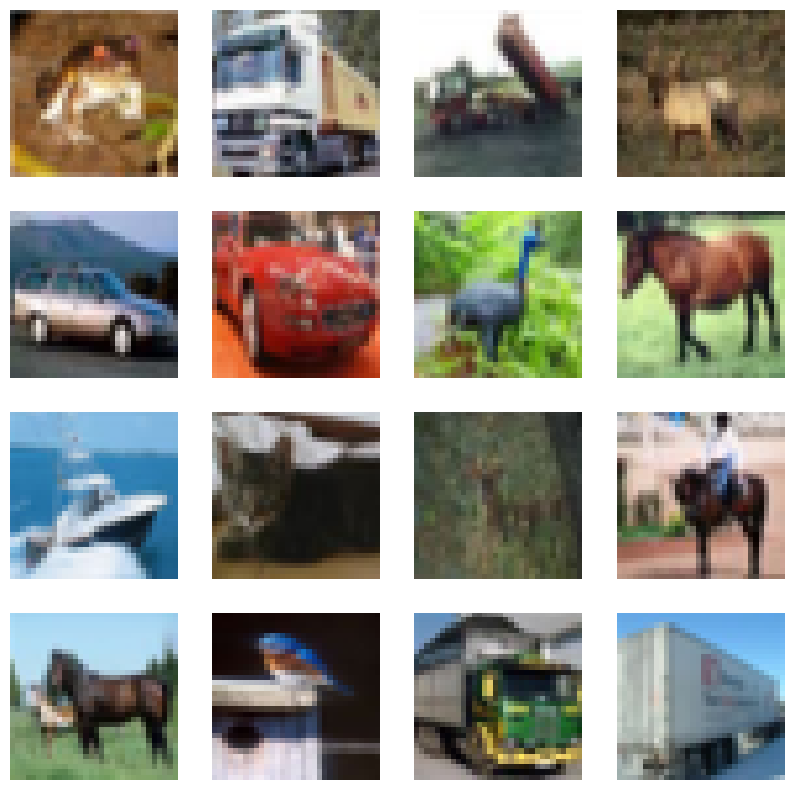

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset for training images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values for augmentation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Display a sample of the training images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

**Create `sample.jpg`**

In [2]:
from PIL import Image, ImageDraw

# Create a blank white image
image = Image.new('RGB', (224, 224), color = (255, 255, 255))

# Draw a red square
draw = ImageDraw.Draw(image)
draw.rectangle([(50, 50), (174, 174)], fill=(255, 0, 0))

# Save the image
image.save('sample.jpg')

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array 

# Load a sample image 
img_path = 'sample.jpg' 
img = load_img(img_path) 
x = img_to_array(img) 
x = np.expand_dims(x, axis=0) 

**Basic Data Augmentation** 

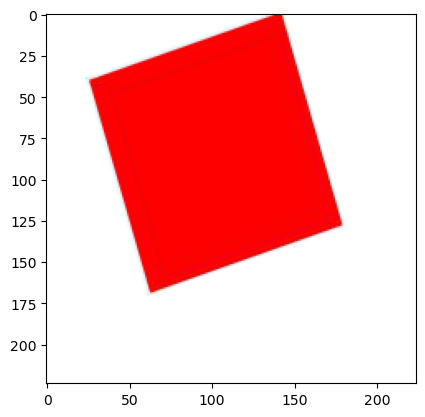

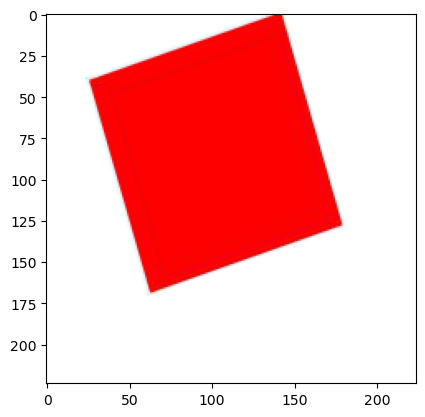

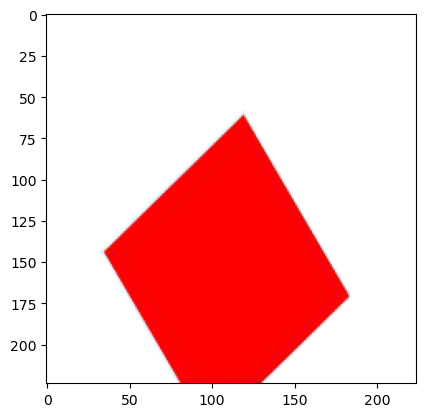

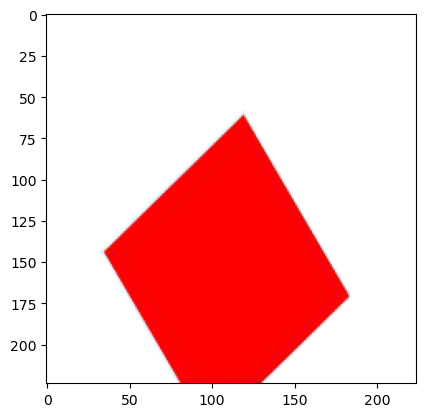

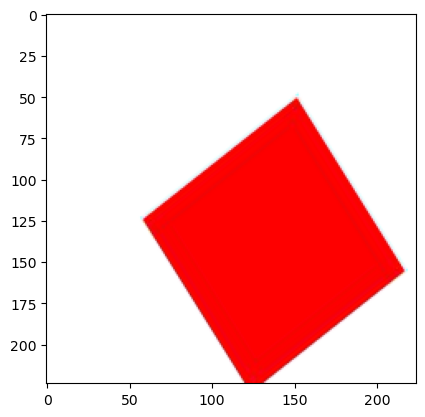

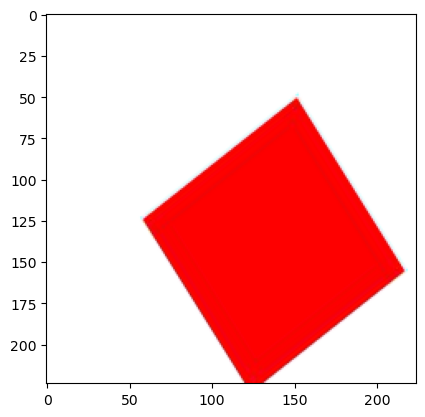

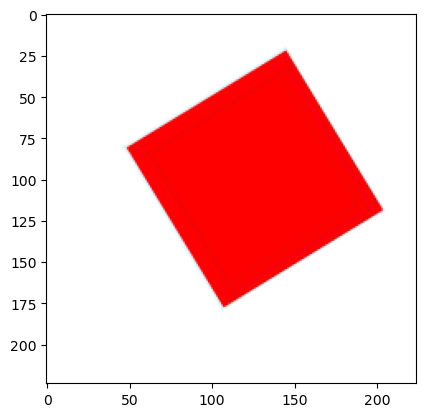

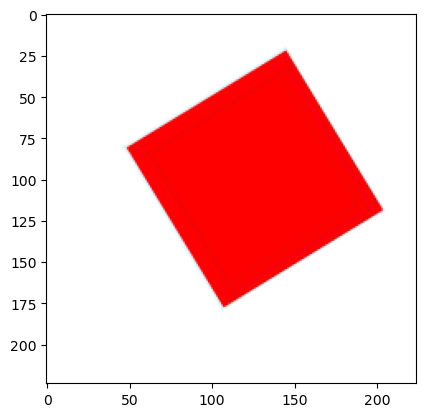

In [4]:
# Load the sample image
img_path = 'sample.jpg'
img = load_img(img_path)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Create an instance of ImageDataGenerator with basic augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate batches of augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

**Feature-wise and Sample-wise Normalization**

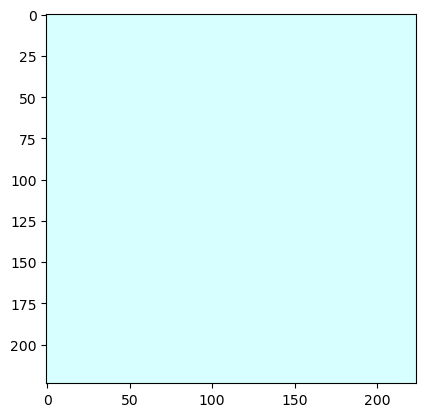

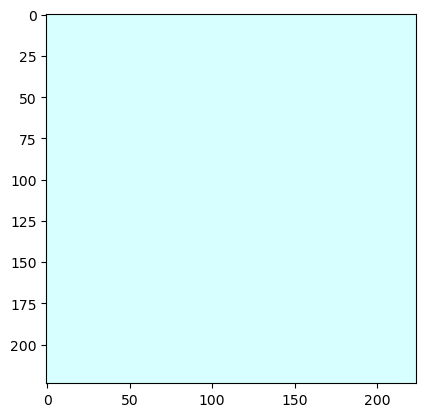

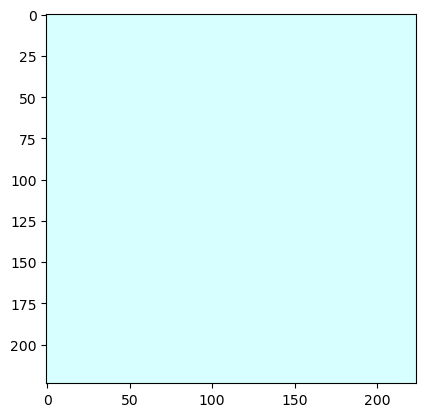

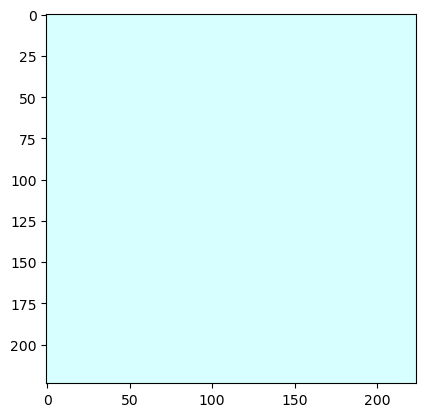

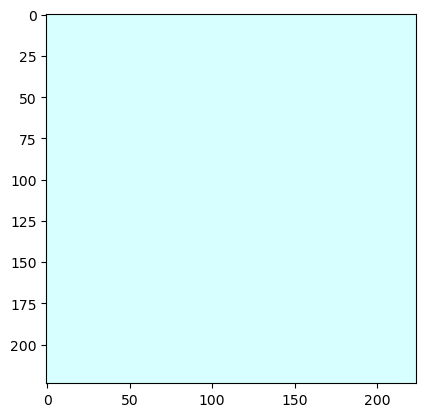

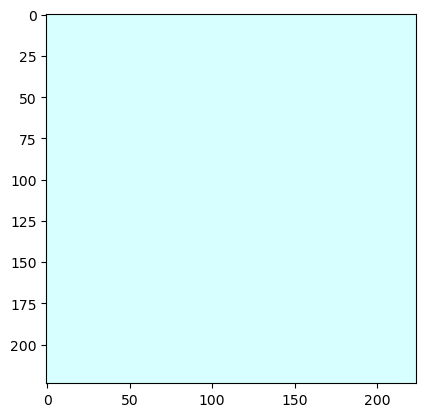

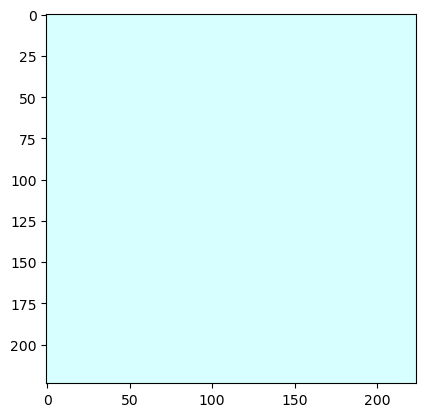

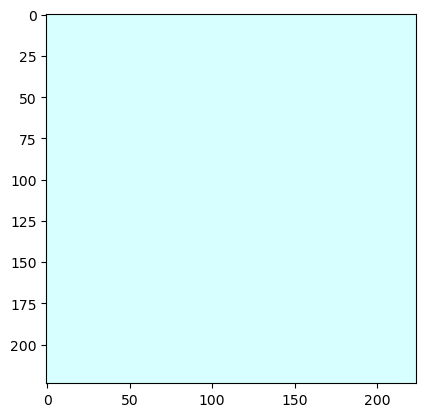

In [5]:
# Create an instance of ImageDataGenerator with normalization options
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Load the sample image again and fit the generator (normally done on the training set)
datagen.fit(x)

# Generate batches of normalized images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

**Custom Data Augmentation Function**

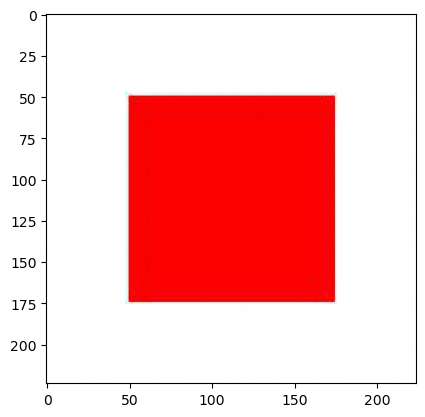

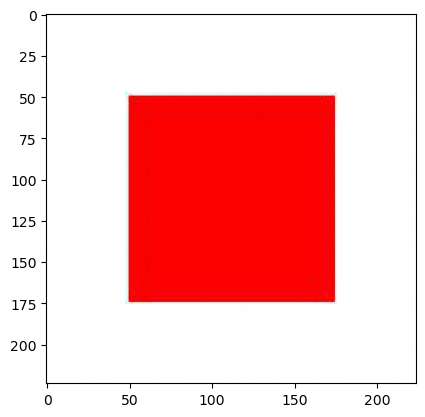

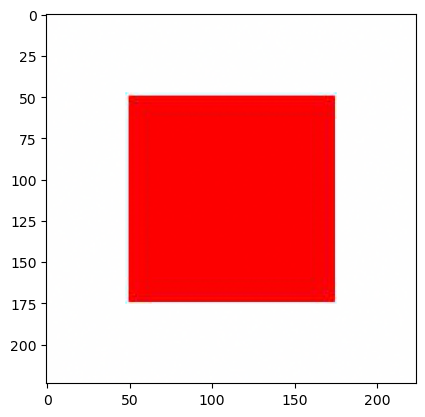

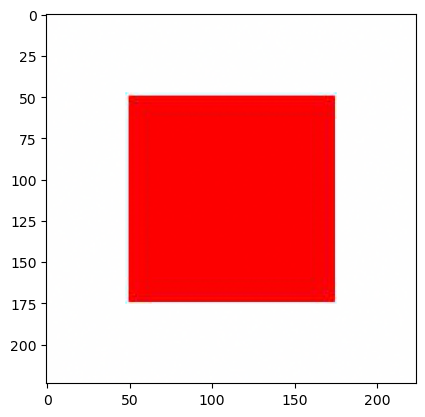

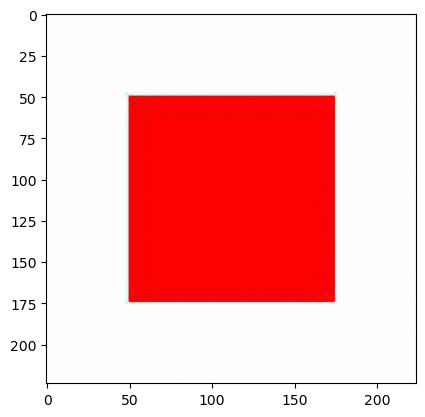

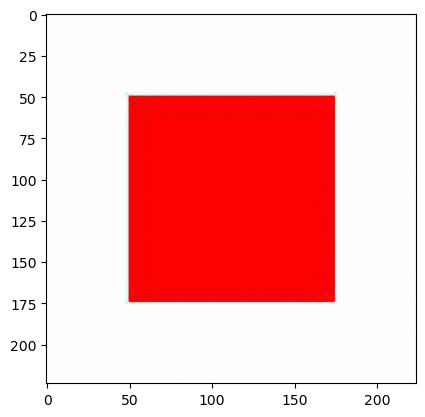

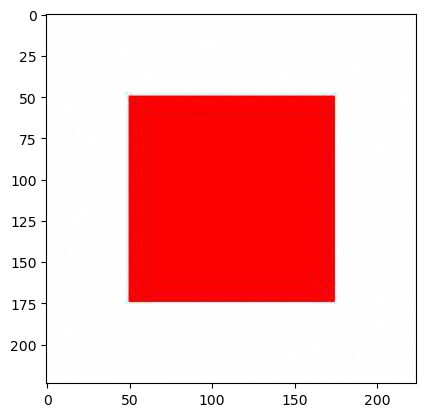

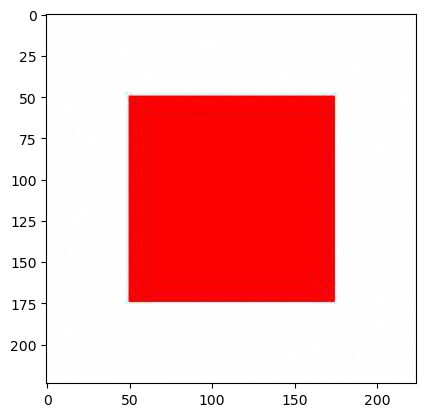

In [6]:
# Define a custom data augmentation function
def add_random_noise(image):
    noise = np.random.normal(0, 0.1, image.shape)
    return image + noise

# Create an instance of ImageDataGenerator with the custom augmentation
datagen = ImageDataGenerator(preprocessing_function=add_random_noise)

# Generate batches of augmented images with noise
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

**Visualize Augmented Images**

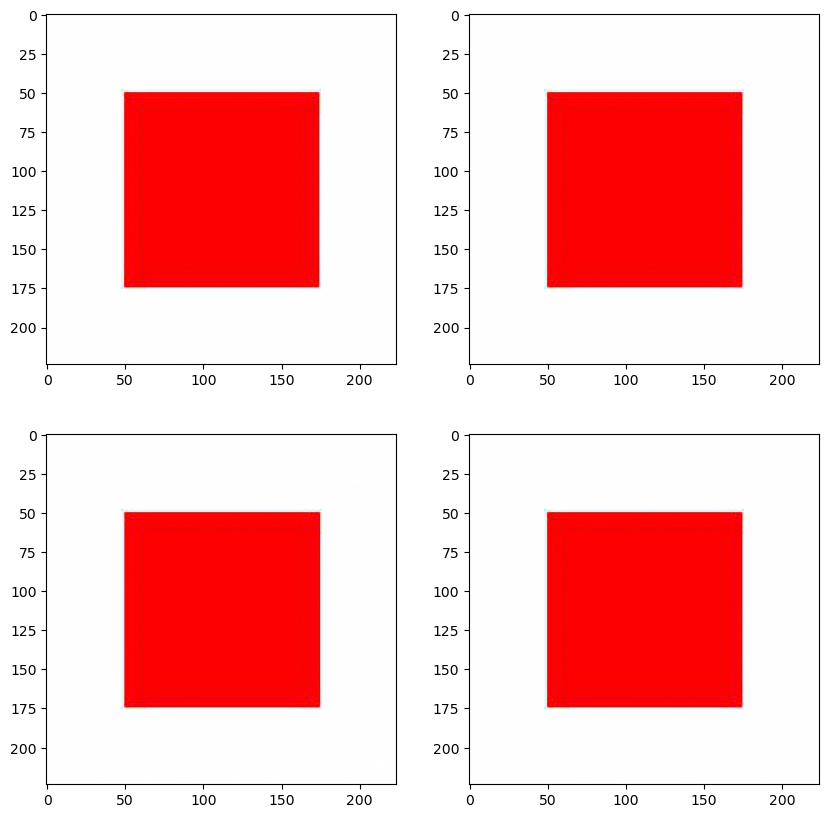

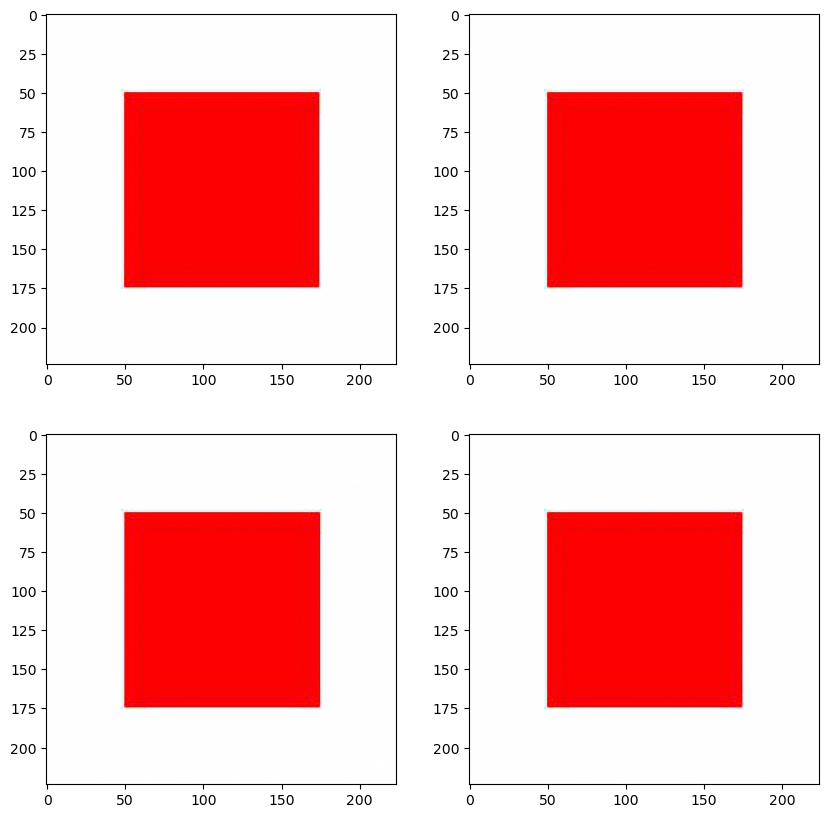

In [7]:
# Visualizing multiple augmented versions of the same image
plt.figure(figsize=(10, 10))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    if i >= 4:  # Show only 4 versions
        break
    plt.subplot(2, 2, i+1)
    plt.imshow(batch[0].astype('uint8'))
plt.show()

**Apply and Visualize Different Augmentation Techniques**

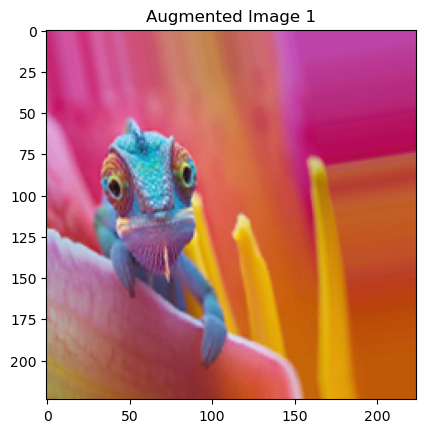

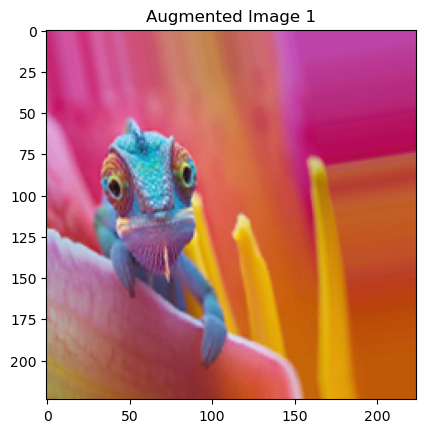

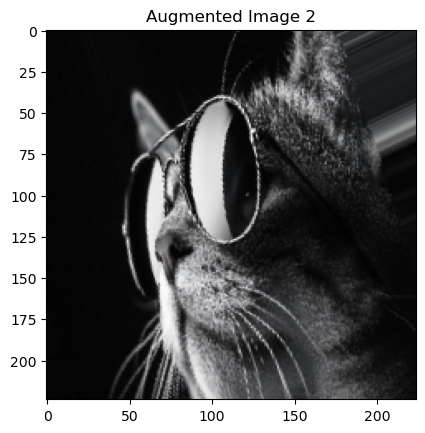

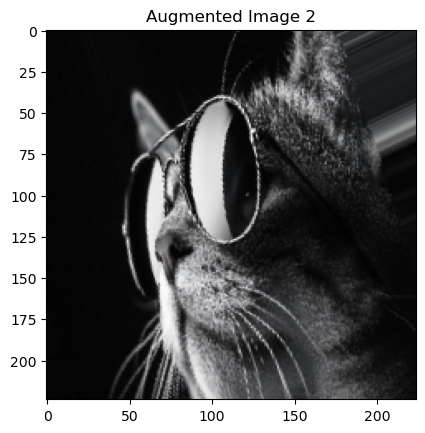

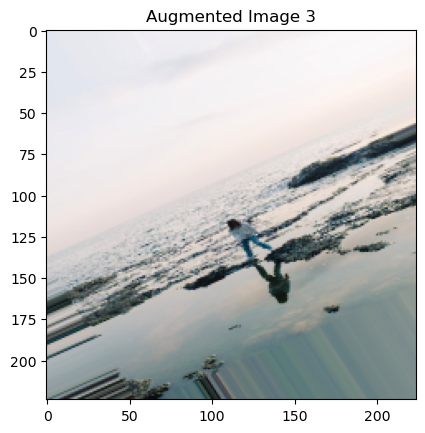

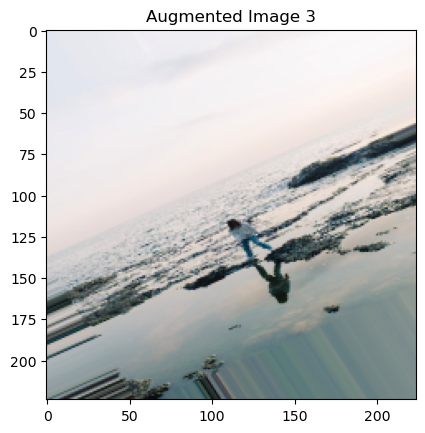

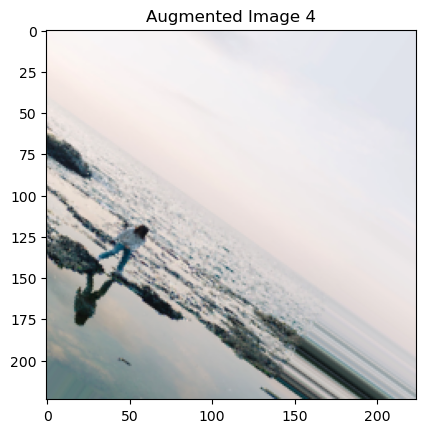

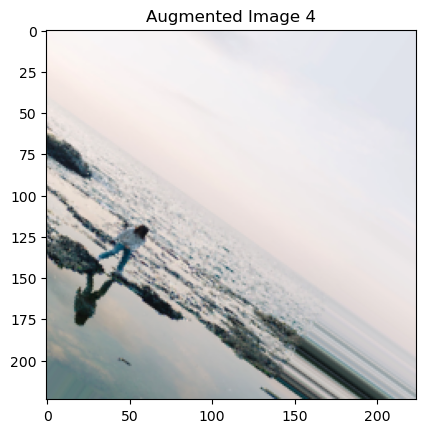

In [8]:
from tensorflow.keras.preprocessing.image import array_to_img

# Define the augmentation parameters  
datagen = ImageDataGenerator(  
    rotation_range=40,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,  
    zoom_range=0.2,  
    horizontal_flip=True,  
    fill_mode='nearest'  
)  

# Load and preprocess the dataset
image_paths = [
    "Image1.jpg",  
    "Image2.jpg",  
    "Image3.jpg" 
]  

training_images = []
for image_path in image_paths:  
    img = load_img(image_path, target_size=(224, 224))  
    img_array = img_to_array(img)  
    training_images.append(img_array)  
training_images = np.array(training_images)  

# Generate and visualize augmented images  
i = 0
for batch in datagen.flow(training_images, batch_size=1):  
    plt.figure(i)  
    imgplot = plt.imshow(array_to_img(batch[0]))  
    plt.title(f'Augmented Image {i + 1}')  
    i += 1  
    if i % 4 == 0:  
        break  
plt.show()  

**Implement Feature-wise and Sample-wise Normalization**

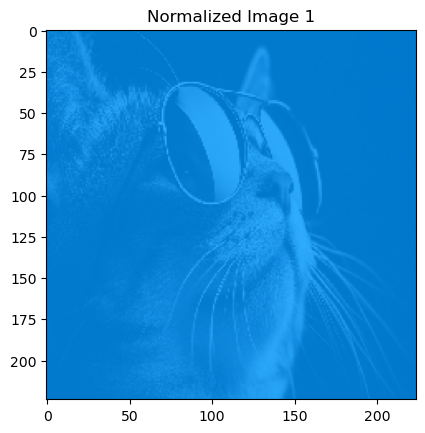

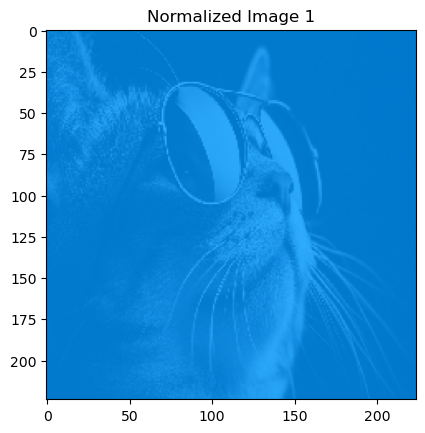

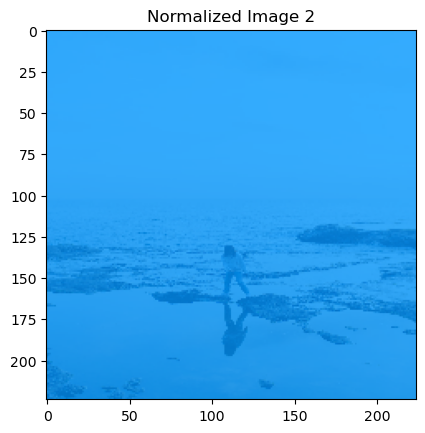

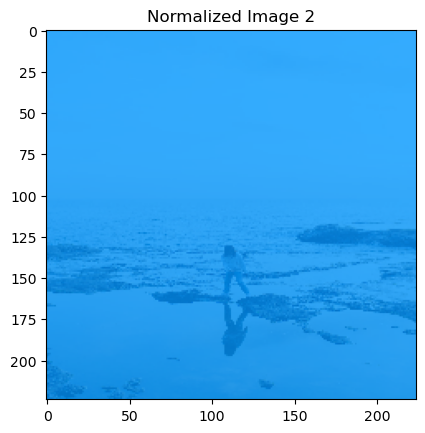

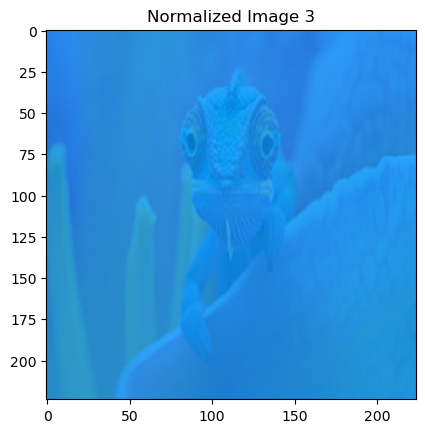

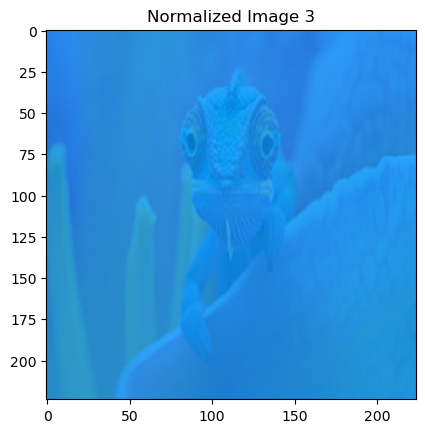

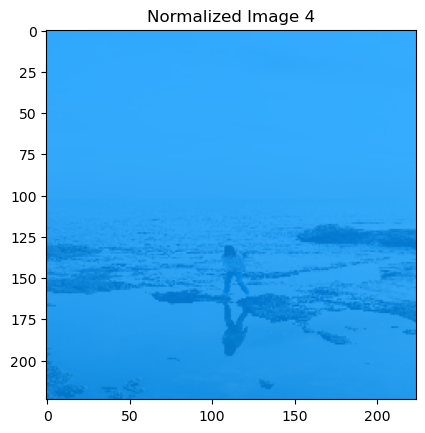

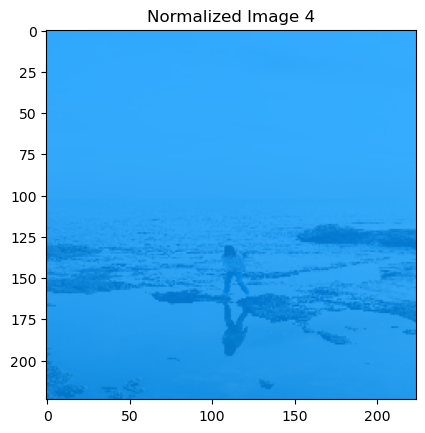

In [9]:
# Create an instance of ImageDataGenerator with normalization options
datagen = ImageDataGenerator(  
    featurewise_center=True,  
    featurewise_std_normalization=True,  
    samplewise_center=True,  
    samplewise_std_normalization=True  
)  

# Fit the ImageDataGenerator to the dataset  
datagen.fit(training_images)  

# Generate and visualize normalized images  
i = 0  

for batch in datagen.flow(training_images, batch_size=1):  
    plt.figure(i)  
    imgplot = plt.imshow(array_to_img(batch[0]))  
    plt.title(f'Normalized Image {i + 1}')  

    i += 1  
    if i % 4 == 0:  
        break  

plt.show()  

**Create and Apply a Custom Data Augmentation Function**

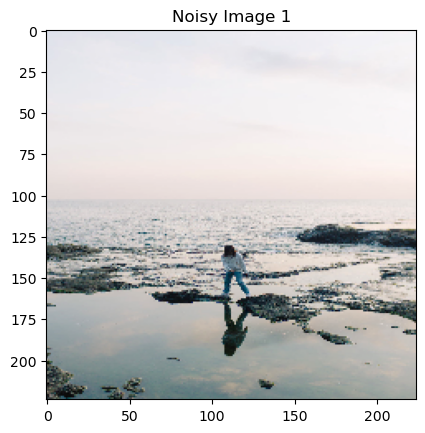

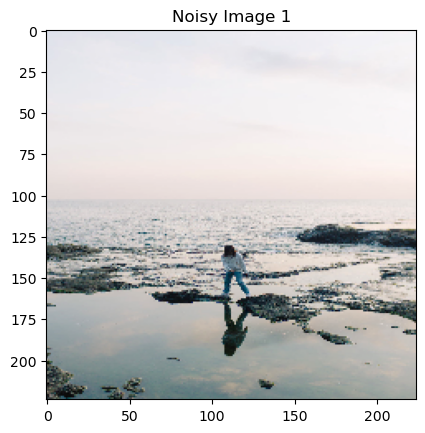

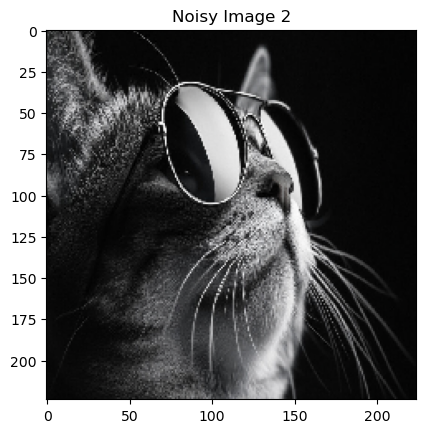

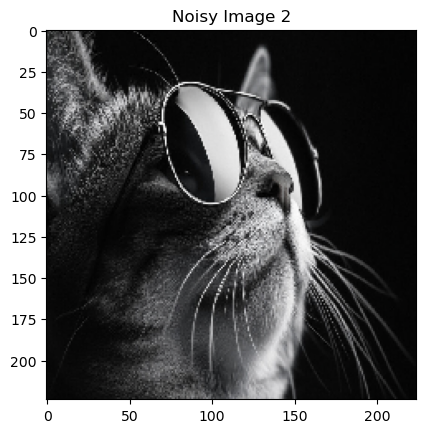

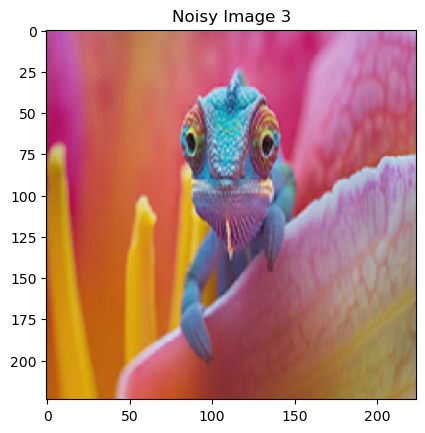

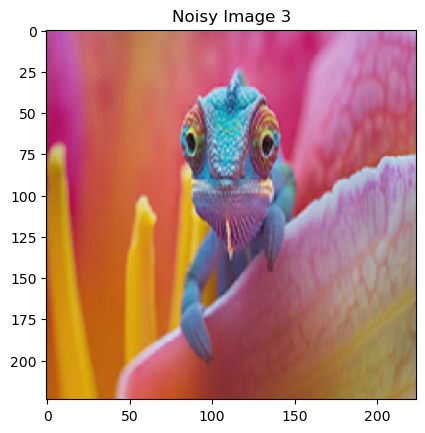

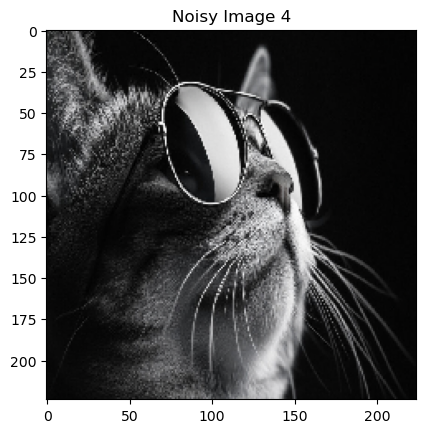

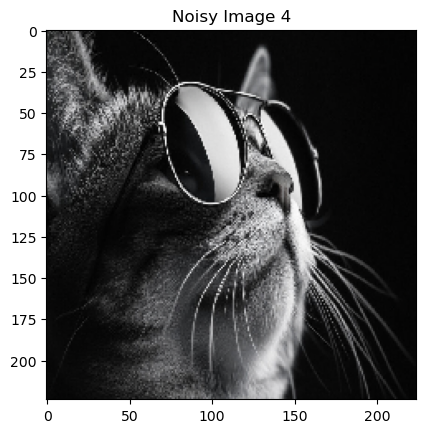

In [10]:
# Define a custom augmentation function to add random noise  
def add_random_noise(image):  
    noise = np.random.normal(0, 0.1, image.shape)  
    return image + noise  

# Create an instance of ImageDataGenerator with custom augmentation  
datagen = ImageDataGenerator(preprocessing_function=add_random_noise)  

# Generate and visualize augmented images  
i = 0  

for batch in datagen.flow(training_images, batch_size=1):  
    plt.figure(i)  
    imgplot = plt.imshow(array_to_img(batch[0]))  
    plt.title(f'Noisy Image {i + 1}')  

    i += 1  
    if i % 4 == 0:  
        break  

plt.show()  